
# Lab | Customer Analysis Round 4

In today's lesson we talked about continuous distributions (mainly normal distribution), linear regression and how multicollinearity can impact the model. In this lab, we will test your knowledge on those things using the `marketing_customer_analysis.csv` file. You have been using the same data in the previous labs (round 2 and 3). You can continue using the same jupyter file. The file can be found in the `files_for_lab` folder.

### Get the data 

Use the jupyter file from the last lab (Customer Analysis Round 3)

### Complete the following task 

- Check the data types of the columns. Get the numeric data into dataframe called `numerical` and categorical columns in a dataframe called `categoricals`.
(You can use np.number and np.object to select the numerical data types and categorical data types respectively)
- Now we will try to check the normality of the numerical variables visually
  - Use seaborn library to construct distribution plots for the numerical variables
  - Use Matplotlib to construct histograms
  - Do the distributions for different numerical variables look like a normal distribution 
- For the numerical variables, check the multicollinearity between the features. Please note that we will use the column `total_claim_amount` later as the target variable. 
- Drop one of the two features that show a high correlation between them (greater than 0.9). Write code for both the correlation matrix and for seaborn heatmap. If there is no pair of features that have a high correlation, then do not drop any features

This step is related to processing data

In [60]:
import pandas as pd  
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('marketing_customer_analysis.csv')

In [61]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [6]:

numerical = df.select_dtypes(include=np.number)
categoricals = df.select_dtypes(include=object)
numerical.dtypes

Customer Lifetime Value          float64
Income                             int64
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Total Claim Amount               float64
dtype: object

In [7]:
categoricals.dtypes

Customer             object
State                object
Response             object
Coverage             object
Education            object
Effective To Date    object
EmploymentStatus     object
Gender               object
Location Code        object
Marital Status       object
Policy Type          object
Policy               object
Renew Offer Type     object
Sales Channel        object
Vehicle Class        object
Vehicle Size         object
dtype: object

In [8]:
numerical.dtypes

Customer Lifetime Value          float64
Income                             int64
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Total Claim Amount               float64
dtype: object

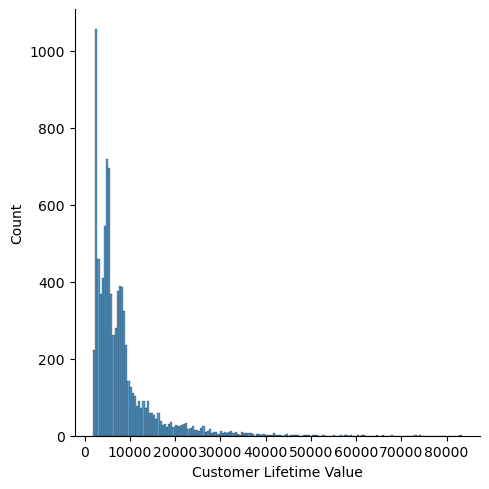

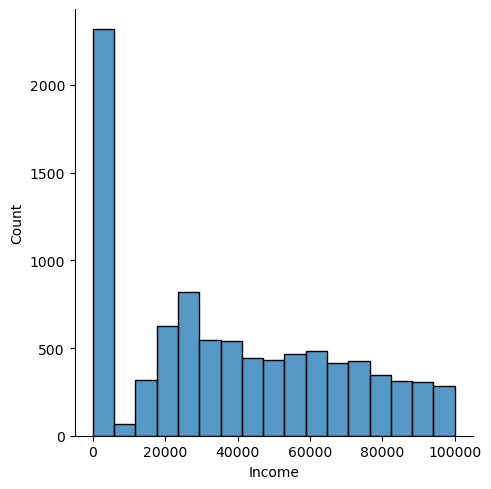

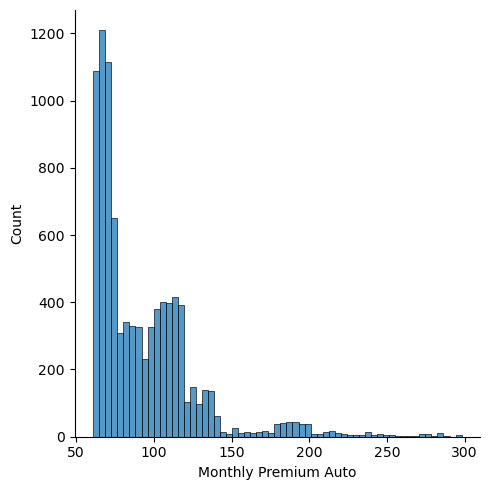

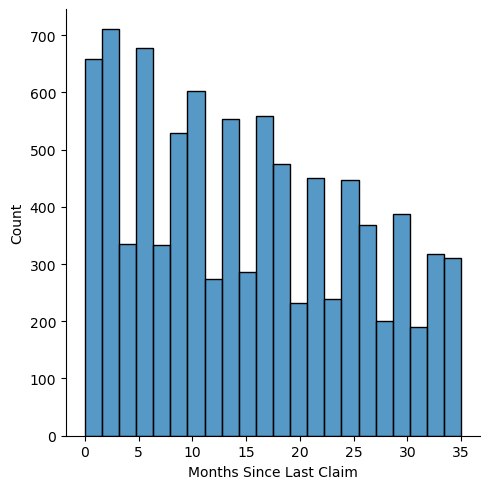

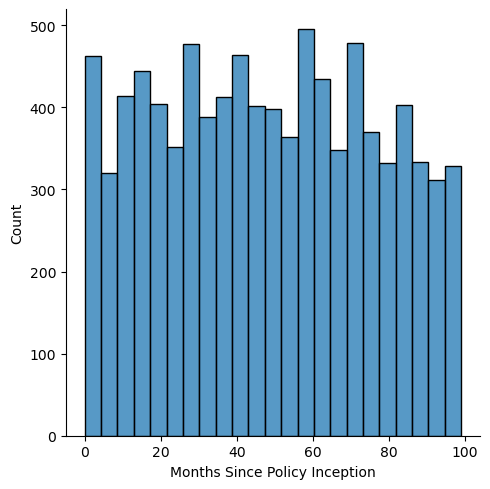

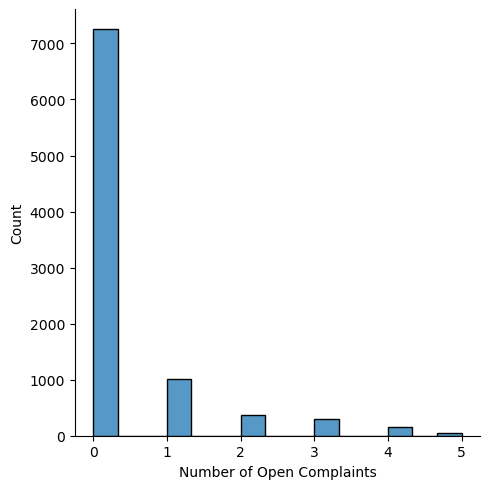

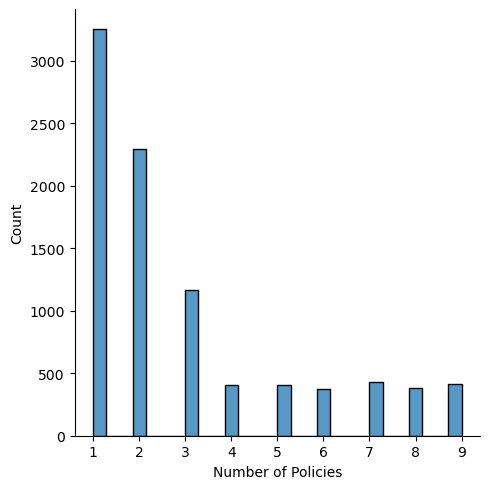

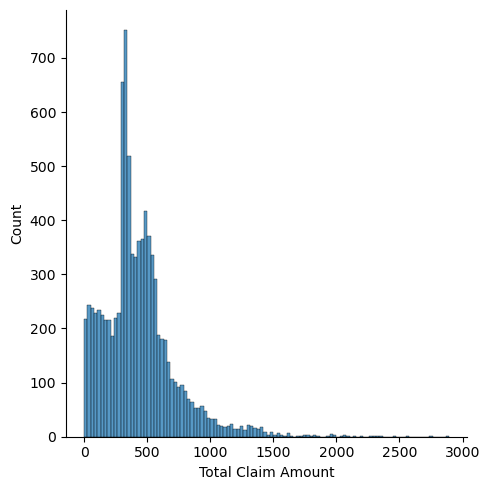

In [9]:
for column in numerical.columns:
    sns.displot(numerical[column])
    plt.show()

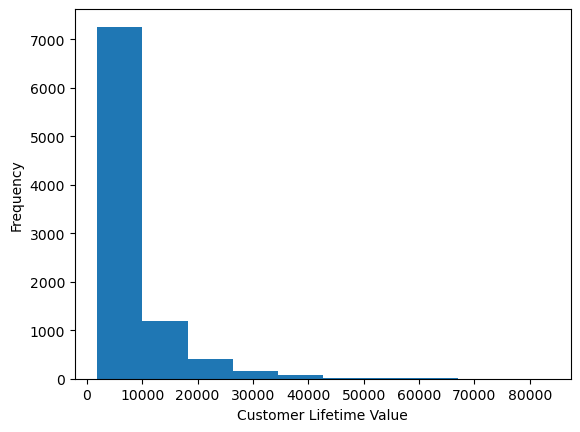

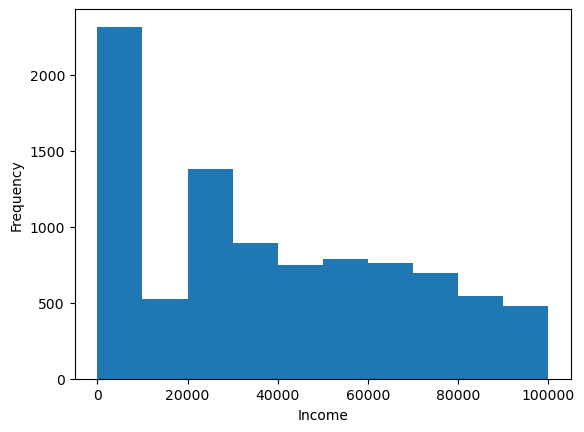

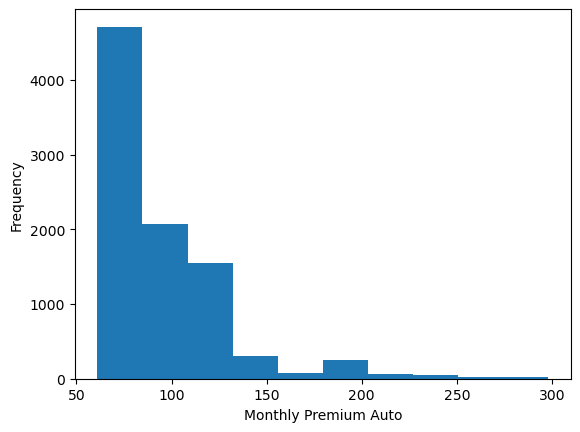

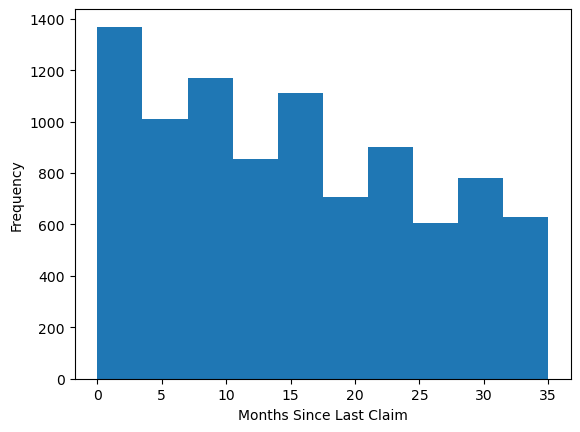

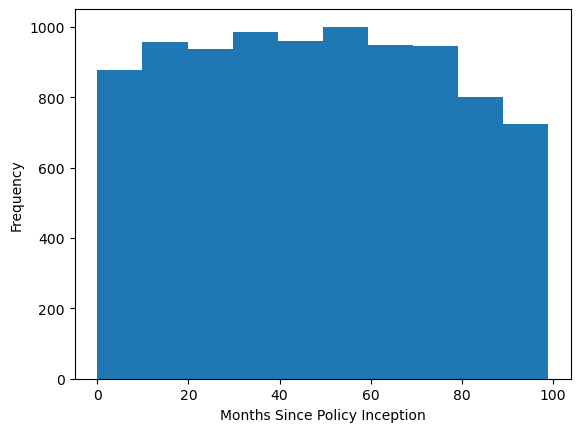

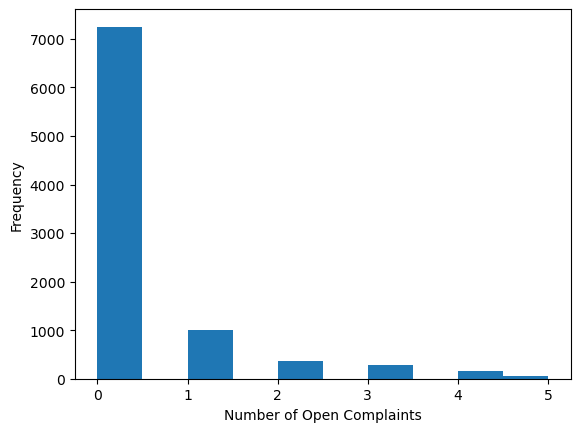

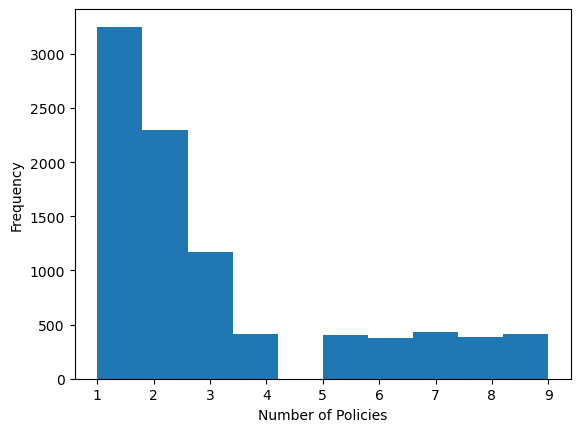

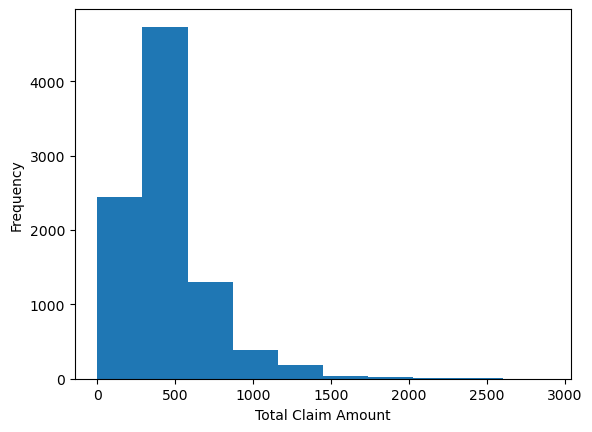

In [10]:
for column in numerical.columns:
    plt.hist(numerical[column])  
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [11]:
#only the column Months scince last claim has normal distribution

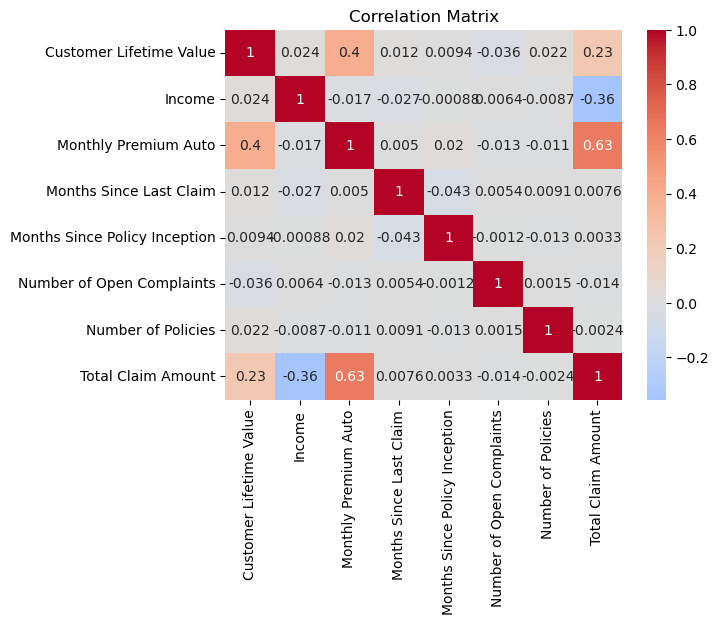

In [12]:
correlation_matrix = numerical.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

--------------------------------------------------------STARTING LAB 5-------------------------------------------------------

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
y=numerical['Total Claim Amount']
X=numerical.drop(['Total Claim Amount'],axis=1)

In [15]:
transformer = MinMaxScaler().fit(X)
x_normalized = transformer.transform(X)
print(x_normalized.shape)


x_norm=pd.DataFrame(x_normalized, columns=X.columns)
x_norm.head()

(9134, 7)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000


---------------------------------------------------------starting lab 6----------------------------------------------------------------------

In [29]:
df_encoded = df.drop(columns=['Customer'])


One Hot/Label Encoding (categorical).
Concat DataFrames
Linear Regression
Train-test split.
Apply linear regression.
Model Validation
Description:
R2.
MSE.
RMSE.
MAE.

In [30]:
print(df.dtypes)
print(categoricals.nunique())

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object
Cu

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Label Encoding for each categorical column
label_encoder = LabelEncoder()
for column in categoricals.columns:
    categoricals[column] = label_encoder.fit_transform(categoricals[column])

# OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)
categoricals_encoded = encoder.fit_transform(categoricals)
categoricals_encoded_names = encoder.get_feature_names_out(input_features=categoricals.columns)

categoricals_encoded_df = pd.DataFrame(categoricals_encoded, columns=categoricals_encoded_names)

# Concatenate numerical and categorical encoded DataFrames
X_encoded = pd.concat([x_norm, categoricals_encoded_df], axis=1)




C:\Users\jmcso\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [38]:
print(df.dtypes)
print(categoricals.nunique())

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object
Cu

In [39]:
print(X_encoded.shape)
print(X_encoded.head())

(9134, 9241)
   Customer Lifetime Value    Income  Monthly Premium Auto  \
0                 0.010629  0.562847              0.033755   
1                 0.062406  0.000000              0.139241   
2                 0.134960  0.487763              0.198312   
3                 0.070589  0.000000              0.189873   
4                 0.011245  0.438443              0.050633   

   Months Since Last Claim  Months Since Policy Inception  \
0                 0.914286                       0.050505   
1                 0.371429                       0.424242   
2                 0.514286                       0.383838   
3                 0.514286                       0.656566   
4                 0.342857                       0.444444   

   Number of Open Complaints  Number of Policies  Customer_1  Customer_2  \
0                        0.0               0.000         0.0         0.0   
1                        0.0               0.875         0.0         0.0   
2                  

In [40]:
X_encoded = pd.concat([x_norm, categoricals_encoded_df], axis=1)

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [42]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 9241)
(1827, 9241)
(7307,)
(1827,)


In [45]:
X_train.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Customer_1,Customer_2,Customer_3,...,Sales Channel_1,Sales Channel_2,Sales Channel_3,Vehicle Class_1,Vehicle Class_2,Vehicle Class_3,Vehicle Class_4,Vehicle Class_5,Vehicle Size_1,Vehicle Size_2
5123,0.035258,0.511537,0.000000,0.800000,0.323232,0.2,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7738,0.011416,0.000000,0.075949,0.857143,0.252525,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
214,0.012464,0.811124,0.054852,0.200000,0.676768,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8580,0.039793,0.722777,0.012658,0.057143,0.666667,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7857,0.008748,0.547474,0.021097,0.085714,0.868687,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
y_train.head()

5123    223.305224
7738    568.800000
214     355.200000
8580    272.649844
7857    391.970334
Name: Total Claim Amount, dtype: float64

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [52]:
y_pred = model.predict(X_test)

In [53]:
r2 = r2_score(y_test, y_pred)

In [54]:
mse = mean_squared_error(y_test, y_pred)

In [55]:
rmse = np.sqrt(mse)

In [56]:
mae = mean_absolute_error(y_test, y_pred)

In [57]:
print("R-squared (R2):", r2)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

R-squared (R2): 0.7213198108265088
Mean Squared Error (MSE): 22158.15188275921
Root Mean Squared Error (RMSE): 148.85614492777654
Mean Absolute Error (MAE): 103.98285776466909


In [59]:
#TRIED REGULARIZATION BUT IT GAVE WORSE RESULTS

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data for feature scaling
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Initialize the Ridge regression model with regularization parameter alpha (adjust alpha as needed)
ridge_model = Ridge(alpha=1.0)

# Train the Ridge model on the scaled training data
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled testing data
y_pred = ridge_model.predict(X_test_scaled)

# Calculate evaluation metrics (R-squared, MSE, RMSE, MAE)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation results
print("R-squared (R2) with Ridge Regression:", r2)
print("Mean Squared Error (MSE) with Ridge Regression:", mse)
print("Root Mean Squared Error (RMSE) with Ridge Regression:", rmse)
print("Mean Absolute Error (MAE) with Ridge Regression:", mae)


R-squared (R2) with Ridge Regression: 0.5792787088114554
Mean Squared Error (MSE) with Ridge Regression: 33451.98773588714
Root Mean Squared Error (RMSE) with Ridge Regression: 182.8988456384762
Mean Absolute Error (MAE) with Ridge Regression: 127.8225476456945
